In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Your Python environment has Theano(-PyMC) 1.1.2 installed, but you are importing PyMC 4.0.0b1 which uses Aesara as its backend.
For PyMC 4.0.0b1 to work as expected you should uninstall Theano(-PyMC).
See https://github.com/pymc-devs/pymc/wiki for update instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
You are importing PyMC 4.0.0b1, but your environment also has the legacy version PyMC3 3.11.4 installed.
For PyMC 4.0.0b1 to work as expected you should uninstall PyMC3.
See https://github.com/pymc-devs/pymc/wiki for update instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

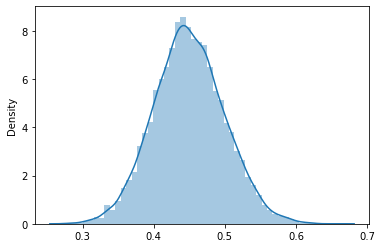

In [2]:
beta = np.random.beta(45, 55, size=10000)
sns.distplot(beta)

/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


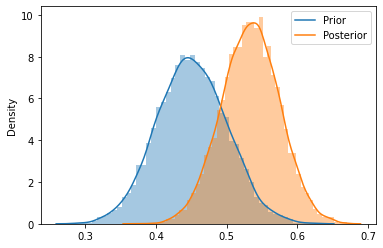

In [4]:
def plot_beta_binomial(a, b, y, n):
    prior = np.random.beta(a, b, size=10000)
    posterior = np.random.beta(a + y, n - y + b, size=10000)
    sns.distplot(prior)
    sns.distplot(posterior)
    plt.legend(["Prior", "Posterior"])


plot_beta_binomial(45, 55, 35, 50)

In [5]:
def beta_mean(a, b):
    return a / (a + b)


def beta_mode(a, b):
    if a < 1 and b < 1:
        return "0 and 1"
    elif a <= 1 and b > 1:
        return 0
    elif a > 1 and b < 1:
        return 1
    else:
        return (a - 1) / (a + b - 2)


def beta_var(a, b):
    return (a * b) / ((a + b) ^ 2 * (a + b + 1))


def summarize_beta_binomial(a=5, b=5, y=None, n=None):
    prior_mean = beta_mean(a, b)
    prior_mode = beta_mode(a, b)
    prior_var = beta_var(a, b)
    prior_sd = np.sqrt(prior_var)
    if y is None and n is None:
        data = {
            "model": ["prior"],
            "alpha": [a],
            "beta": [b],
            "mean": [prior_mean],
            "mode": [prior_mode],
            "var": [prior_var],
            "sd": [prior_sd],
        }
        return pd.DataFrame(data)
    else:
        post_alpha = y + a
        post_beta = n - y + b
        post_mean = beta_mean(post_alpha, post_beta)
        post_mode = beta_mode(post_alpha, post_beta)
        post_var = beta_var(post_alpha, post_beta)
        post_sd = np.sqrt(post_var)
        data = {
            "model": ["prior", "posterior"],
            "alpha": [a, post_alpha],
            "beta": [b, post_beta],
            "mean": [prior_mean, post_mean],
            "mode": [prior_mode, post_mode],
            "var": [prior_var, post_var],
            "sd": [prior_sd, post_sd],
        }
        return pd.DataFrame(data)

In [6]:
summarize_beta_binomial(a=45, b=55, y=30, n=50)

,model,alpha,beta,mean,mode,var,sd
0,prior,45,55,0.45,0.44898,14.224138,3.771490
1,posterior,75,75,0.50,0.50000,12.784091,3.575485


In [7]:
pi = np.random.beta(45, 55, size=10000)
y = np.random.binomial(50, pi, 10000)

michelle_sim = pd.DataFrame({"pi": pi, "y": y})

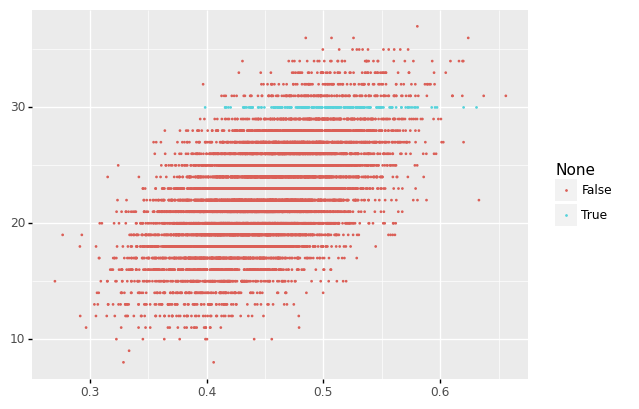

<ggplot: (309596088)>

In [8]:
from plotnine import aes, geom_density, geom_line, geom_point, ggplot

ggplot(michelle_sim, aes(x=pi, y=y)) + geom_point(aes(color=(y == 30)), size=0.1)

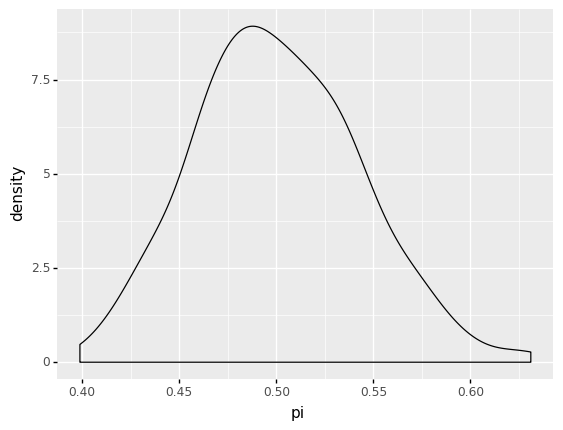

<ggplot: (310129851)>

In [9]:
michelle_posterior = michelle_sim[michelle_sim["y"] == 30]

# Plot the remaining pi values
ggplot(michelle_posterior, aes(x=michelle_posterior["pi"])) + geom_density()

In [10]:
michelle_posterior["pi"].mean(), michelle_posterior["pi"].std()

(0.5004424776641552, 0.042356854706317525)

/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:ylabel='Density'>

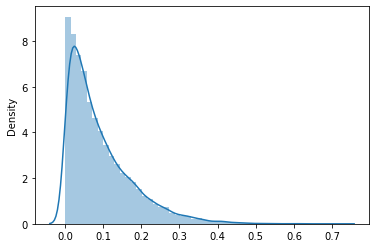

In [11]:
beta = np.random.beta(1, 10, size=10000)
sns.distplot(beta)

In [12]:
summarize_beta_binomial(a=1, b=10, y=26, n=40)

,model,alpha,beta,mean,mode,var,sd
0,prior,1,10,0.090909,0.000000,0.526316,0.725476
1,posterior,27,24,0.529412,0.530612,7.120879,2.668498


/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/tomkealy/opt/anaconda3/envs/intuitive_bayes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


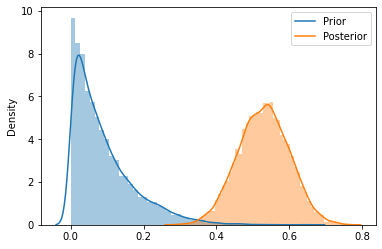

In [13]:
plot_beta_binomial(1, 10, 26, 40)